In [1]:
# Introduction to Pandas
import pandas as pd
import numpy as np

# Series and DataFrame and Data Input


In [2]:
data_series = pd.Series([10, 20, 30, 40])
data_series

0    10
1    20
2    30
3    40
dtype: int64

In [3]:
data_frame = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Salary': [50000, 60000, 70000, 80000]
})

print(data_frame)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
3    David   40   80000


# Selection and Indexing


In [5]:
print( data_frame['Name'])


0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object


In [7]:
print( data_frame.loc[1])


Name        Bob
Age          30
Salary    60000
Name: 1, dtype: object


In [8]:
print( data_frame[data_frame['Age'] > 30])


      Name  Age  Salary
2  Charlie   35   70000
3    David   40   80000


In [9]:
print("Subset of rows and columns:", data_frame.loc[0:2, ['Name', 'Salary']])


Subset of rows and columns:       Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   70000


In [10]:
data_frame = data_frame.set_index('Name')
print("New Index:", data_frame)

New Index:          Age  Salary
Name                
Alice     25   50000
Bob       30   60000
Charlie   35   70000
David     40   80000


# DataFrame Operations


In [11]:
data_frame.head()


,Age,Salary
Name,,
Alice,25,50000
Bob,30,60000
Charlie,35,70000
David,40,80000


In [12]:
print(data_frame['Age'].unique())


[25 30 35 40]


In [13]:
print(data_frame['Age'].value_counts())


Age
25    1
30    1
35    1
40    1
Name: count, dtype: int64


In [14]:
print(data_frame.apply(lambda x: x * 2))


         Age  Salary
Name                
Alice     50  100000
Bob       60  120000
Charlie   70  140000
David     80  160000


In [15]:
print("Columns:", data_frame.columns)


Columns: Index(['Age', 'Salary'], dtype='object')


In [16]:
print("Index:", data_frame.index)


Index: Index(['Alice', 'Bob', 'Charlie', 'David'], dtype='object', name='Name')


In [17]:
print(data_frame.sort_values(by='Salary', ascending=False))


         Age  Salary
Name                
David     40   80000
Charlie   35   70000
Bob       30   60000
Alice     25   50000


In [18]:
print(data_frame.isnull())


           Age  Salary
Name                  
Alice    False   False
Bob      False   False
Charlie  False   False
David    False   False


In [20]:
data_frame['Age'] = data_frame['Age'].replace(30, 31)
data_frame

,Age,Salary
Name,,
Alice,25,50000
Bob,31,60000
Charlie,35,70000
David,40,80000


In [21]:
data_frame = data_frame.drop(['Age'], axis=1)
print(data_frame)

         Salary
Name           
Alice     50000
Bob       60000
Charlie   70000
David     80000


# Handling Missing Data


In [27]:
df_nan = pd.DataFrame({
    'A': [1, np.nan, 3],
    'B': [4, 5, np.nan]
})

df_nan



,A,B
0,1.0,4.0
1,NaN,5.0
2,3.0,NaN


In [28]:
print(df_nan.isnull())


       A      B
0  False  False
1   True  False
2  False   True


In [29]:
print(df_nan.fillna(value=0))

     A    B
0  1.0  4.0
1  0.0  5.0
2  3.0  0.0


# Merging, Joining, Concatenation


In [30]:
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'B': ['B0', 'B1', 'B2']})
merged = pd.merge(df1, df2, on='key')
merged

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [32]:
joined = df1.set_index('key').join(df2.set_index('key'))
joined

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [33]:
print("Joined DataFrame:\n", joined)


Joined DataFrame:
       A   B
key        
K0   A0  B0
K1   A1  B1
K2   A2  B2


In [34]:
concat = pd.concat([df1, df2])
print("Concatenated DataFrame:\n", concat)

Concatenated DataFrame:
   key    A    B
0  K0   A0  NaN
1  K1   A1  NaN
2  K2   A2  NaN
0  K0  NaN   B0
1  K1  NaN   B1
2  K2  NaN   B2


# GroupBy, Discretization and Binning


In [36]:
data_frame = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Salary': [50000, 60000, 70000, 80000]
})

print(data_frame)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
3    David   40   80000


In [39]:
# Reset the index if 'Name' was used as index earlier
data_frame = data_frame.reset_index()
data_frame

,index,Name,Age,Salary
0,0,Alice,25,50000
1,1,Bob,30,60000
2,2,Charlie,35,70000
3,3,David,40,80000


In [41]:
# Group by 'Age' and calculate mean only for numeric columns
grouped = data_frame.groupby('Age')[['Salary']].mean()
#print("GroupBy Example:\n", grouped)
grouped

,Salary
Age,
25,50000.0
30,60000.0
35,70000.0
40,80000.0


In [43]:

bins = [0, 60000, 90000]
labels = ['Low', 'High']

data_frame['Salary_Bin'] = pd.cut(data_frame['Salary'], bins=bins, labels=labels)
data_frame

,index,Name,Age,Salary,Salary_Bin
0,0,Alice,25,50000,Low
1,1,Bob,30,60000,Low
2,2,Charlie,35,70000,High
3,3,David,40,80000,High


# Data Output/Saving


In [44]:
data_frame.to_csv('saved_data.csv')


In [45]:
loaded_df = pd.read_csv('saved_data.csv')
print(loaded_df.head())

   Unnamed: 0  index     Name  Age  Salary Salary_Bin
0           0      0    Alice   25   50000        Low
1           1      1      Bob   30   60000        Low
2           2      2  Charlie   35   70000       High
3           3      3    David   40   80000       High


# Pandas for Plotting


In [52]:
import matplotlib.pyplot as plt
data = pd.DataFrame({
    'A': np.random.rand(20),
    'B': np.random.rand(20),
    'C': np.random.rand(20)
})
data

,A,B,C
0,0.412436,0.941718,0.137573
1,0.550775,0.734721,0.446072
2,0.168901,0.885318,0.868543
3,0.200183,0.202149,0.067144
4,0.103630,0.158453,0.581925
5,0.959998,0.354037,0.898116
6,0.287021,0.099744,0.538766
7,0.066841,0.231295,0.689494
8,0.031660,0.414413,0.461910
9,0.909500,0.448367,0.793581


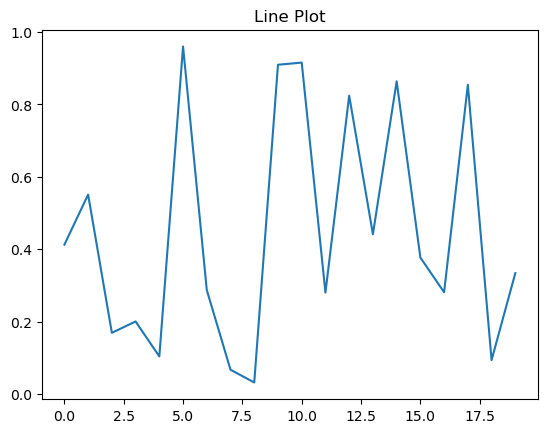

In [53]:

data['A'].plot(kind='line', title='Line Plot')
plt.show()


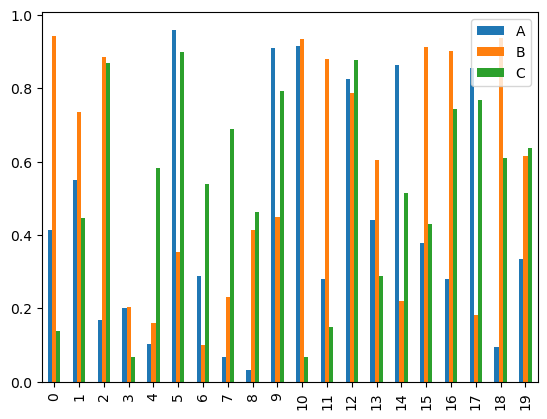

In [54]:
data.plot(kind='bar')
plt.show()

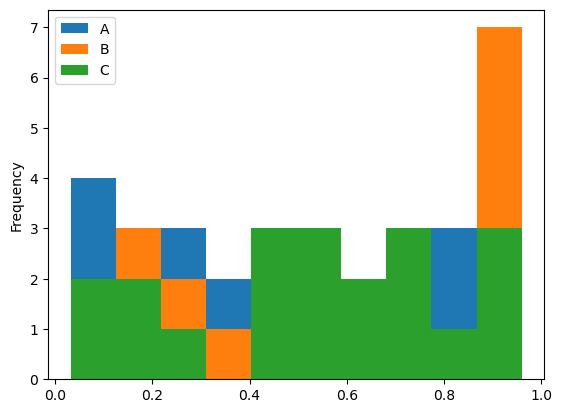

In [55]:
data.plot(kind='hist')
plt.show()

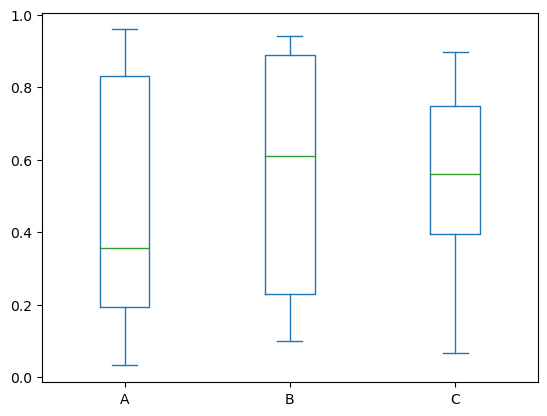

In [56]:
data.plot(kind='box')
plt.show()

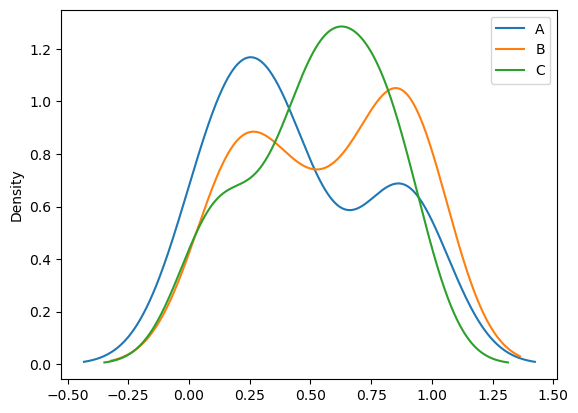

In [57]:

data.plot(kind='kde')
plt.show()